In [1]:
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText

import regress_with_conf_interval as re

In [2]:
filename = r'./data/codeword_length_data/n_32/elapseTime.csv' 
df = pd.read_csv(filename)
type(df)

pandas.core.frame.DataFrame

In [3]:
for idx, elapsed_time in enumerate(df.elapsed_time):
    #print("Elasped time : ", elapsed_time)
    if elapsed_time.find('h') != -1:
        hour, elapsed_time = elapsed_time.split('h')
    else:
        hour = 0.0

    if elapsed_time.find('m') != -1 and elapsed_time.find('ms') == -1:
        minute, elapsed_time = elapsed_time.split('m')
    else:
        minute = 0.0

    if elapsed_time.find('s') != -1 and elapsed_time.find('ms') == -1:
        second, elapsed_time = elapsed_time.split('s')
    else:   
        second = 0.0

    if elapsed_time.find('ms') != -1:
        ms, elapsed_time = elapsed_time.split('ms')
    else:
        ms = 0.0
    
    # print("hour : ", float(hour))
    # print("minute : ", float(minute))
    # print("second : ", float(second))
    # print("ms : ", float(ms))

    df.elapsed_time[idx] = str(float(hour) * 3600 + float(minute) * 60 + float(second) + float(ms) / 100)

In [4]:
# Check conversion
x = df['block_height']
y = df['elapsed_time']

frame = pd.Series(y, index=list(x - 1))
frame

0        5.598576259
1        2.002924818
2       11.089451837
3        1.952394947
4       16.838094863
            ...     
4103    10.973299748
4104    18.589608444
4105     4.629423353
4106    19.546938725
4107    57.983207336
Name: elapsed_time, Length: 4108, dtype: object

In [51]:
#data_interval = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
data_interval = [100, 200, 300, 400, 500, 600, 700, 800]
data_interval[-1]

800

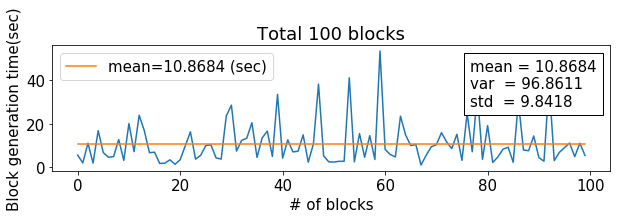

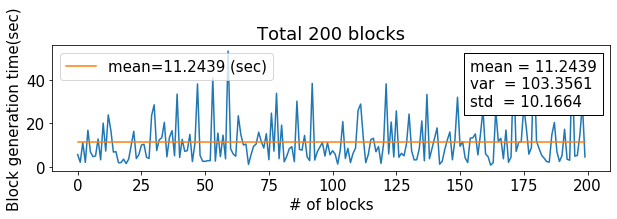

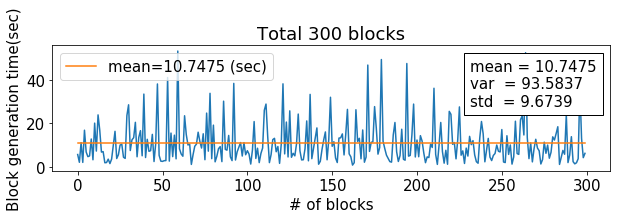

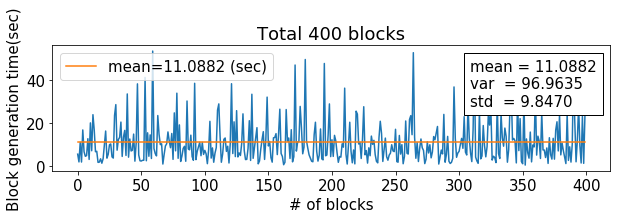

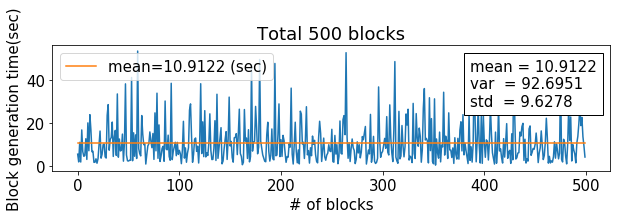

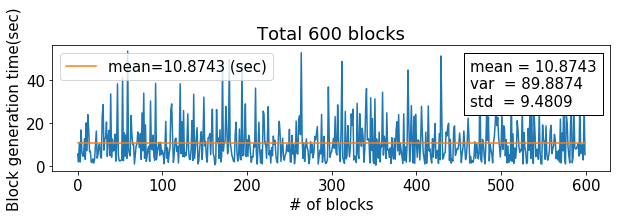

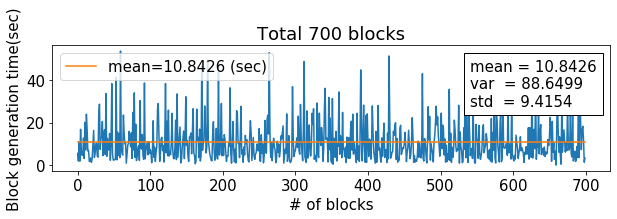

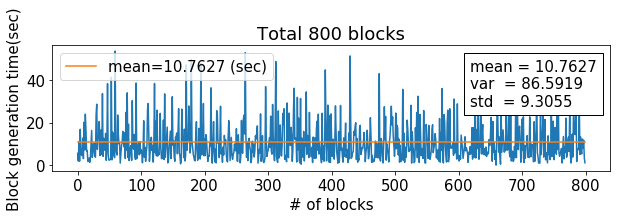

In [52]:
# Plot data
plt.rcParams["figure.figsize"] = (10,30)
mean_list = []
for i, val in enumerate(data_interval):
    x = df['block_height'][:val]
    frame = df['elapsed_time'][:val].astype(float)
    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    
    mean = pd.Series(frame.mean(), index=list(x))
    

    ax.set_title(f"Total {val} blocks")
    ax.set_xlabel("# of blocks")
    ax.set_ylabel("Block generation time(sec)")
    ax.plot(frame)
    ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    
    textstr = '\n'.join((
        r'mean = %.4f' % (frame.mean()),
        r'var  = %.4f' % (frame.var()),
        r'std  = %.4f' % (frame.std()))
    )
    mean_list.append(frame.mean().astype(float))
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="upper left")

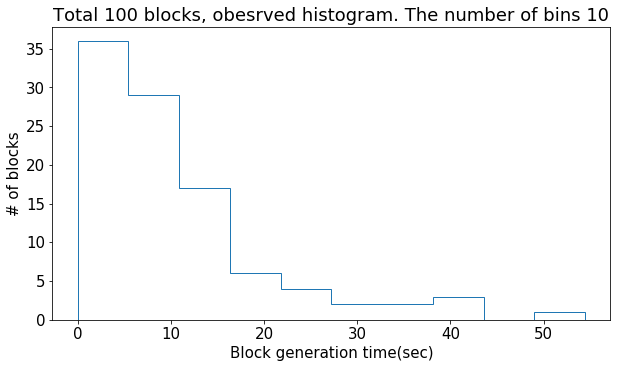

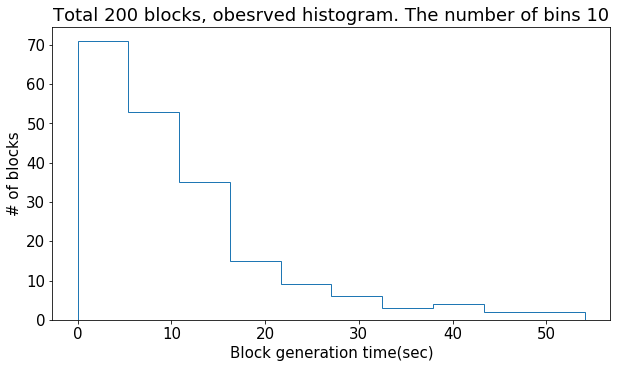

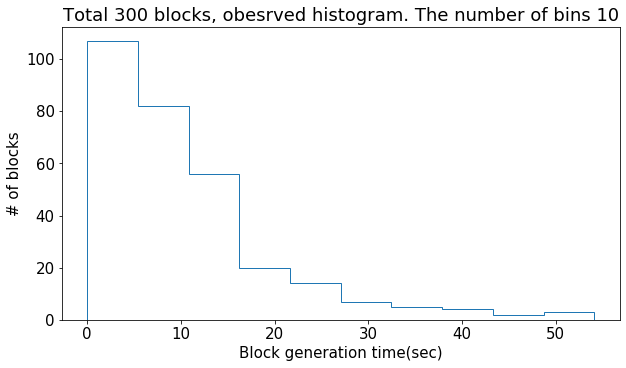

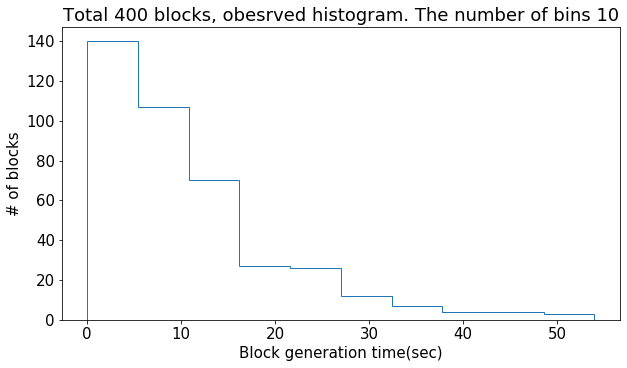

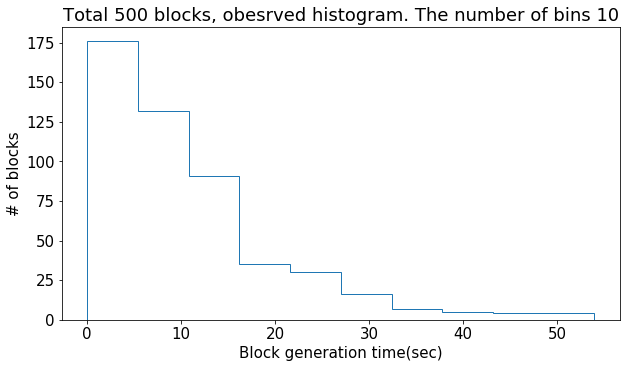

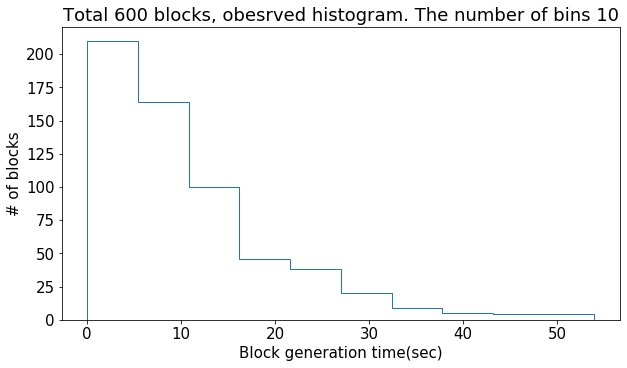

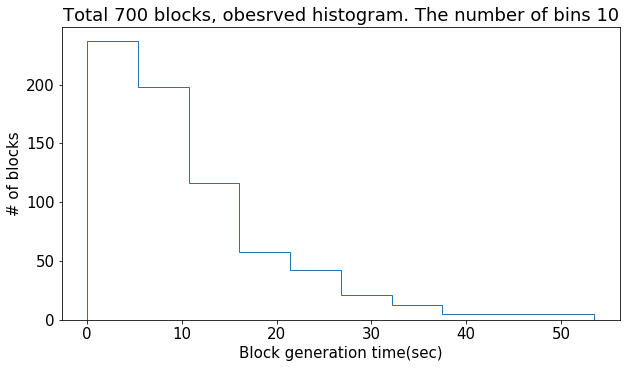

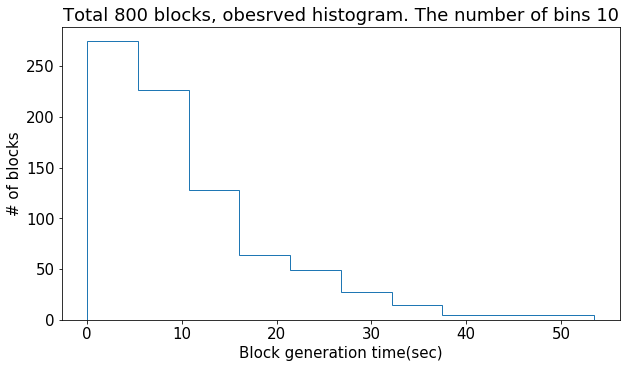

In [53]:
plt.rcParams["figure.figsize"] = (10,70)
num_of_bin = 10
histogram_val_list = []
histogram_bin_list = []
for i, val in enumerate(data_interval):
    x = df['block_height'][:val]
    frame = df['elapsed_time'][:val].astype(float)
    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    

    ax.set_title(f"Total {val} blocks, obesrved histogram. The number of bins {num_of_bin}")
    ax.set_xlabel("Block generation time(sec)")
    ax.set_ylabel("# of blocks")
    #plt.hist(frame, bins=num_of_bin, histtype='step')    
    
    val, bins, patches = plt.hist(frame, bins=num_of_bin * (0 + 1), histtype='step', range=(0, max(frame) + min(frame)))    
    
    histogram_val_list.append(val)
    histogram_bin_list.append(bins)
    #plt.legend(loc="upper left")

In [54]:
patches[0]

&lt;matplotlib.patches.Polygon at 0x7f70121762e0&gt;

In [55]:
histogram_bin_list[0]

array([ 0.        ,  5.443868  , 10.887736  , 16.33160399, 21.77547199,
       27.21933999, 32.66320799, 38.10707598, 43.55094398, 48.99481198,
       54.43867998])

In [56]:
histogram_val_list[0]

array([36., 29., 17.,  6.,  4.,  2.,  2.,  3.,  0.,  1.])

In [57]:
a = histogram_bin_list[0][1:]
b = histogram_bin_list[0][:-1]
c = a - b
print(c)
print(sum(c))
print(max(histogram_bin_list[0]))

[5.443868 5.443868 5.443868 5.443868 5.443868 5.443868 5.443868 5.443868
 5.443868 5.443868]
54.438679977
54.438679977


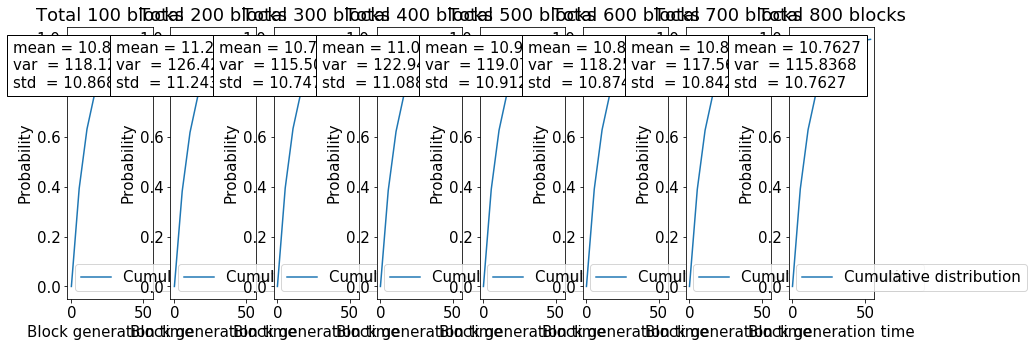

In [58]:
# Plot data
plt.rcParams["figure.figsize"] = (20,5)
cumulative_exp_distr_list = []
fig = plt.figure()

for i, val in enumerate(data_interval):  
    exp_part = np.exp(-(1/mean_list[i]) * np.array(histogram_bin_list[i]))  
    exp_distr = 1/mean_list[i] * exp_part

    cumulative_exp_distr = 1 - exp_part
    cumulative_exp_distr_list.append(cumulative_exp_distr)
    #exp_distr_frequency = (500 * (i + 1)) * exp_distr

    #ax = fig.add_subplot(11,1,i+1)            
    ax = fig.add_subplot(1, 11, i+1)            

    ax.set_title(f"Total {val} blocks")
    ax.set_xlabel("Block generation time")
    #ax.set_ylabel("# of blocks")
    ax.set_ylabel("Probability")

    #ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Expected histogram")
    #print(len(histogram_bin_list[i][:-1]))
    #print(len(exp_distr_histogram))
    
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Exp distribution")
    ax.plot(histogram_bin_list[i], cumulative_exp_distr, label=f"Cumulative distribution")

    #plt.hist(exp_distr_histogram, bins=num_of_bin, histtype='step')    

    textstr = '\n'.join((
        r'mean = %.4f' % (mean_list[i]),
        r'var  = %.4f' % (mean_list[i] * mean_list[i]),
        r'std  = %.4f' % (mean_list[i]))
    )    
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="top left")

In [59]:
cumulative_exp_distr_list[0]
a = np.array(cumulative_exp_distr_list[0][1:])
b = np.array(cumulative_exp_distr_list[0][:-1])
a[-1] = 1
c = a - b
c = np.append(cumulative_exp_distr_list[0][0], c)
print(c)
print(sum(c) == 1)

[0.         0.39400977 0.23876607 0.14468991 0.08768067 0.05313363
 0.03219846 0.01951195 0.01182405 0.00716526 0.01102023]
True


In [60]:
#cumulative_exp_distr_list[2]
histogram_bin_list[0]

array([ 0.        ,  5.443868  , 10.887736  , 16.33160399, 21.77547199,
       27.21933999, 32.66320799, 38.10707598, 43.55094398, 48.99481198,
       54.43867998])

In [61]:
cumulative_exp_distr_list[2]

array([0.        , 0.39566382, 0.63477778, 0.779283  , 0.86661273,
       0.91938925, 0.951284  , 0.97055916, 0.98220784, 0.98924755,
       0.99350191])

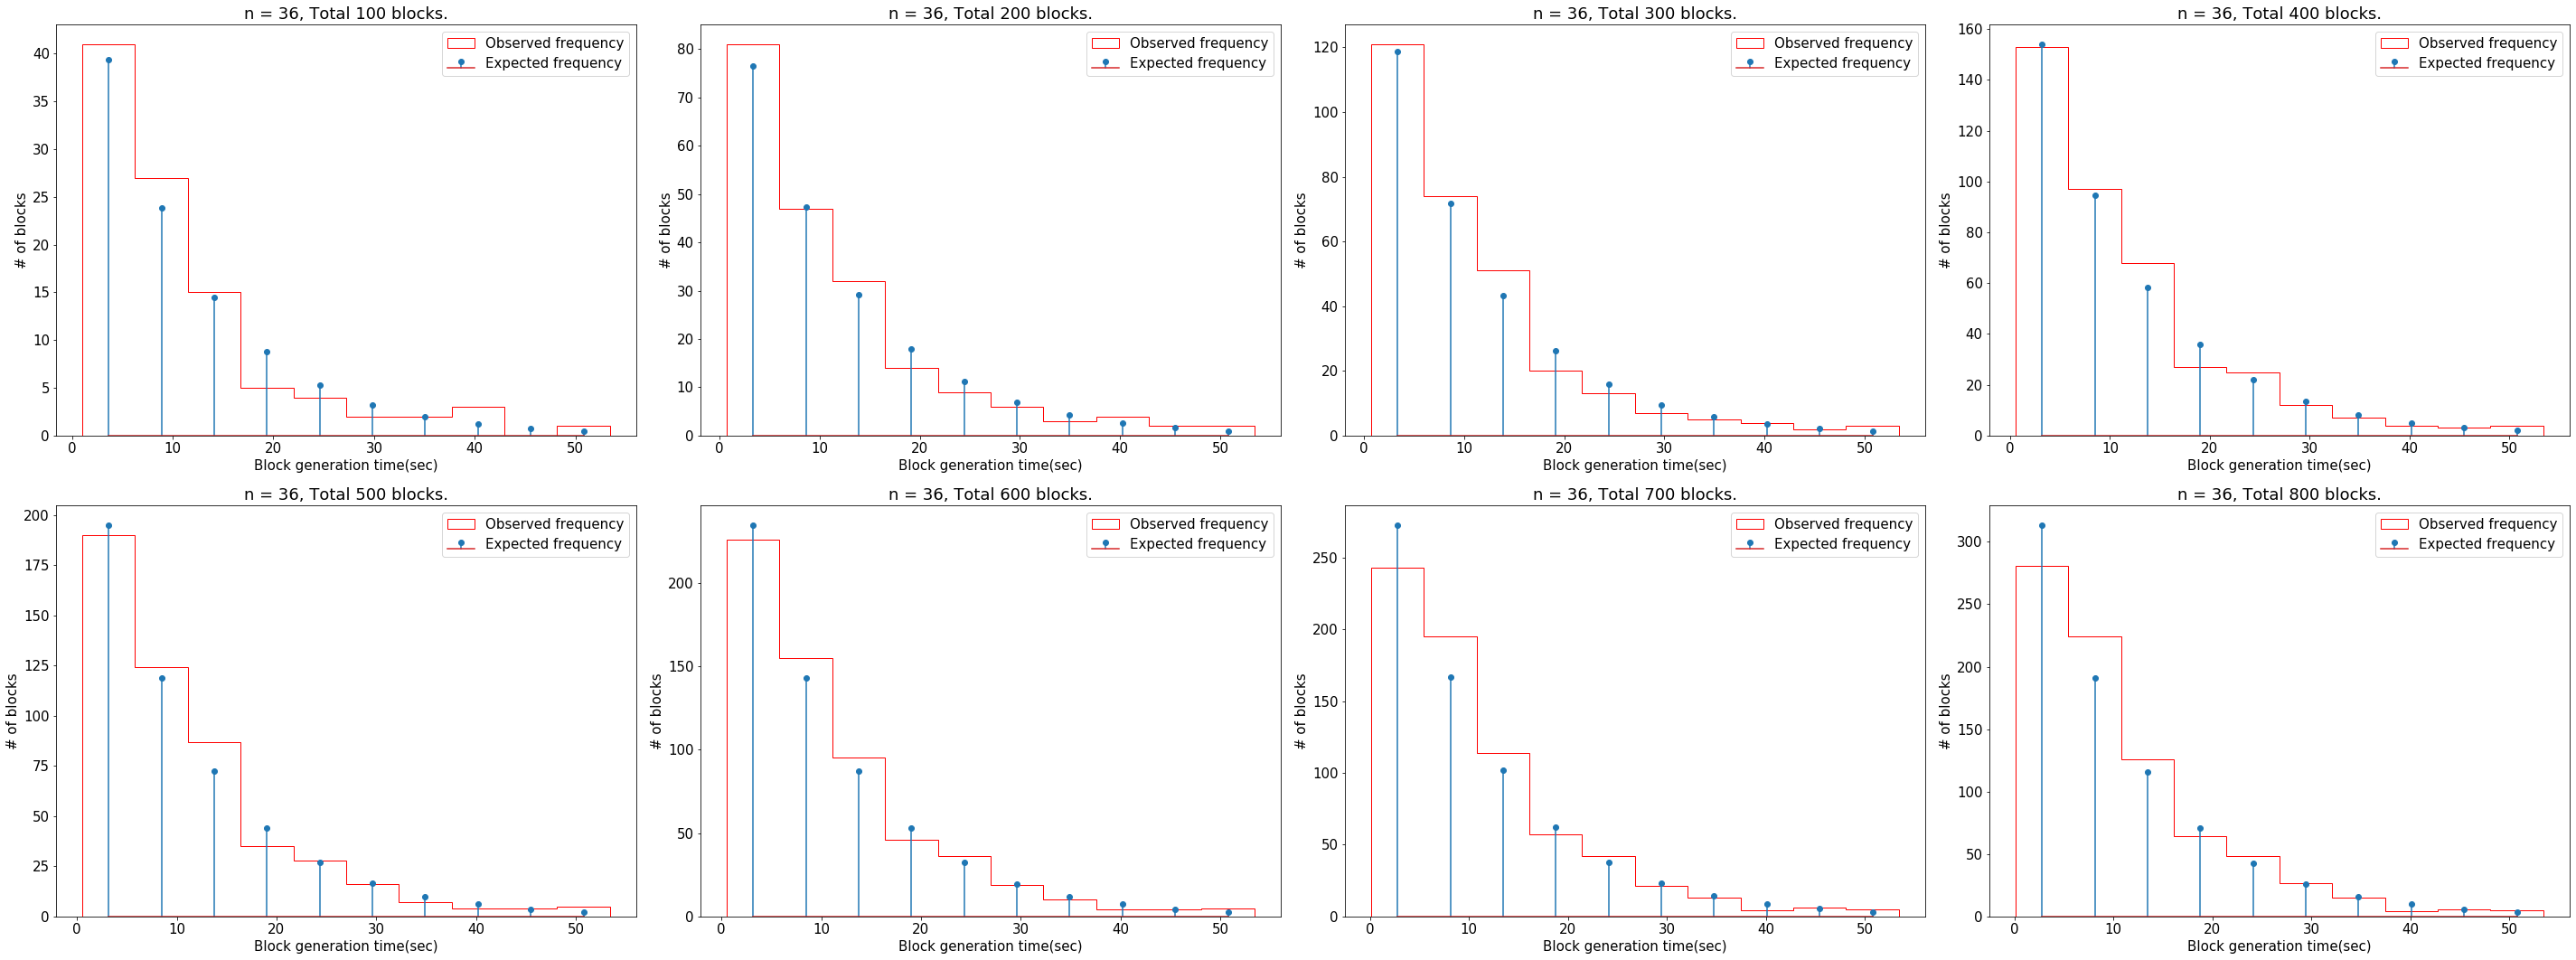

In [62]:
import matplotlib.gridspec as gridspec
plt.rcParams["figure.figsize"] = (40,15)
plt.rcParams.update({'font.size': 15})

expected_histogram_val_list = []
expected_histogram_bin_list = []
interval_val_list = []
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

for i, val in enumerate(data_interval):
    frame = df['elapsed_time'][:val].astype(float)
    cumulative_exp_distr = cumulative_exp_distr_list[i]
        
    #left_shifted = np.array(cumulative_exp_distr_list[i][1:])
    #right_shifted = np.array(cumulative_exp_distr_list[i][:-1])

    left_shifted = np.array(cumulative_exp_distr[1:])
    right_shifted = np.array(cumulative_exp_distr[:-1])
    # last interval includes [90%, inf]
    #left_shifted[-1] = 1

    interval = left_shifted - right_shifted
    #interval = np.append(right_shifted[0], interval)

    #assert sum(interval) == 1 #and len(interval) == len(cumulative_exp_distr)
    expected_freq = val * interval
    interval_val_list.append(expected_freq)

    
    ax = fig.add_subplot(spec[i//4, i%4])  
    #ax = fig.add_subplot(i//4 + 1, 4, i+1)  
    

    #ax.set_title(f"Total {val} blocks. The number of bins {num_of_bin}")
    ax.set_title(f"n = 32, Total {val} blocks.")
    ax.set_xlabel("Block generation time(sec)")
    ax.set_ylabel("# of blocks")
    #ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Expected histogram")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr_frequency, label=f"Expected frequency")
    
    #temp = histogram_bin_list[i] - (histogram_bin_list[i][1] - histogram_bin_list[i][0])
    #temp[0]
    #x_axis = histogram_bin_list[i][1:] - ((histogram_bin_list[i][1:] - histogram_bin_list[i][:-1]) / 2)

    #ax.stem(x_axis, expected_freq, label=f"Expected frequency")
    #ax.hist(frame, bins=num_of_bin, histtype='step', range=(0, max(frame) + min(frame)), label=f"Observed frequency", color="R", )    

    fig.tight_layout()
    val, bins, _ = ax.hist(frame, bins=num_of_bin, histtype='step', label=f"Observed frequency", color="R")    
    x_axis = bins[1:] - ((bins[1:] - bins[:-1]) / 2)
    ax.stem(x_axis, expected_freq, label=f"Expected frequency")    


    '''
    textstr = '\n'.join((
        r'mean = %.4f' % (mean_list[i]),
        r'var  = %.4f' % (mean_list[i] * mean_list[i]),
        r'std  = %.4f' % (mean_list[i]))
    )    
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)
    '''
    plt.legend(loc="upper right")


In [63]:
print(histogram_val_list[1])
print(sum(histogram_val_list[1]))
print(interval_val_list[1])
print(sum(interval_val_list[1]))

[71. 53. 35. 15.  9.  6.  3.  4.  2.  2.]
200.0
[76.41506701 47.21875468 29.17763316 18.0295792  11.14092168  6.8842503
  4.25394806  2.62861943  1.62428878  1.0036881 ]
198.37675040489967


In [64]:
# 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%
from scipy.stats import anderson_ksamp
for i in range(len(data_interval)):
    result = anderson_ksamp([histogram_val_list[i], interval_val_list[i]])
    print(result)


Anderson_ksampResult(statistic=-1.1198006812943295, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.0107843547763211, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.1820361279065328, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.1937716215276473, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.0107843547763211, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.2058345268086075, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.1345569816295757, critical_values=array([0.325, 1.226, 1.961

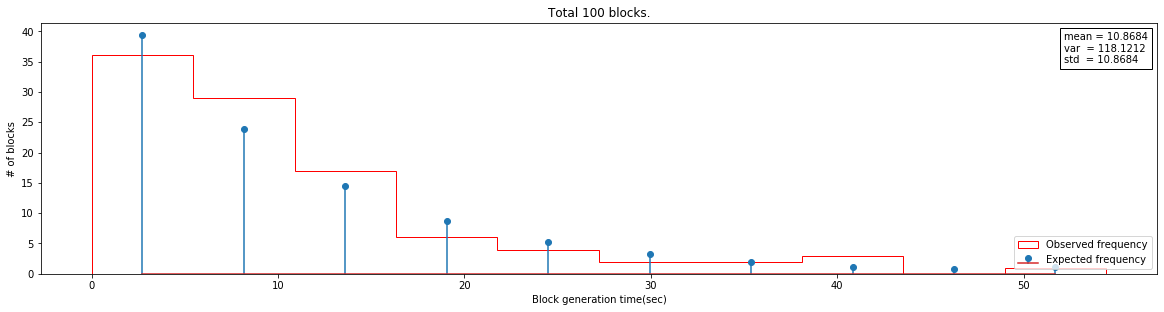

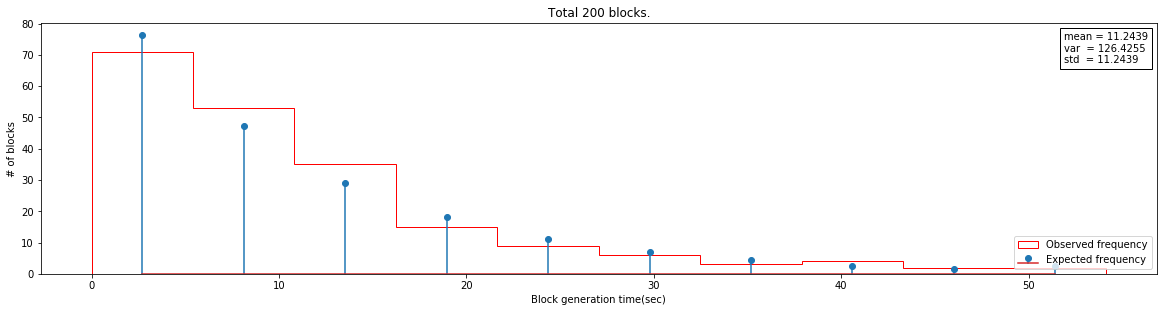

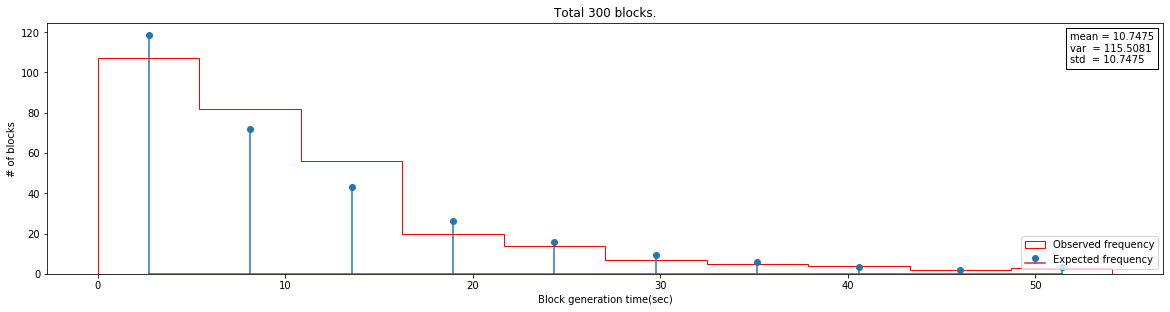

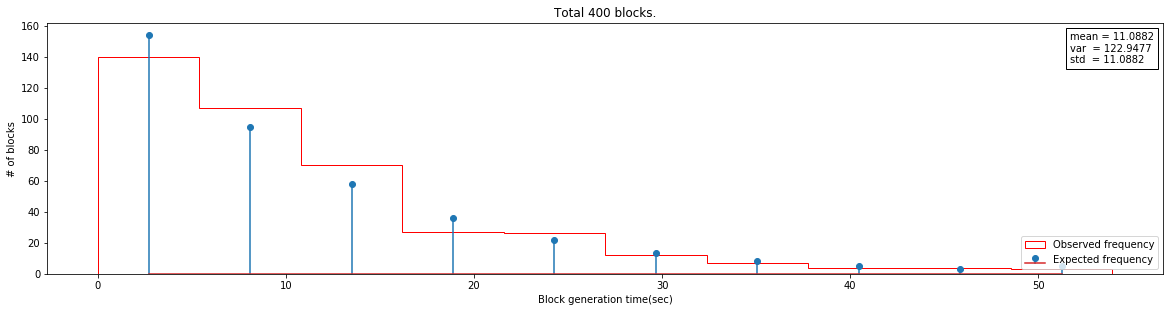

In [19]:
plt.rcParams["figure.figsize"] = (20,60)
expected_histogram_val_list = []
expected_histogram_bin_list = []
interval_val_list = []
for i, val in enumerate(data_interval):
    frame = df['elapsed_time'][:val].astype(float)
    cumulative_exp_distr = cumulative_exp_distr_list[i]
        
    #left_shifted = np.array(cumulative_exp_distr_list[i][1:])
    #right_shifted = np.array(cumulative_exp_distr_list[i][:-1])

    left_shifted = np.array(cumulative_exp_distr[1:])
    right_shifted = np.array(cumulative_exp_distr[:-1])
    # last interval includes [90%, inf]
    left_shifted[-1] = 1

    interval = left_shifted - right_shifted
    #interval = np.append(right_shifted[0], interval)

    assert sum(interval) == 1 #and len(interval) == len(cumulative_exp_distr)
    expected_freq = val * interval
    interval_val_list.append(expected_freq)

    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)            

    #ax.set_title(f"Total {val} blocks. The number of bins {num_of_bin}")
    ax.set_title(f"Total {val} blocks.")
    ax.set_xlabel("Block generation time(sec)")
    ax.set_ylabel("# of blocks")
    #ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Expected histogram")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr_frequency, label=f"Expected frequency")
    
    #temp = histogram_bin_list[i] - (histogram_bin_list[i][1] - histogram_bin_list[i][0])
    #temp[0]

    x_axis = histogram_bin_list[i][1:] - ((histogram_bin_list[i][1:] - histogram_bin_list[i][:-1]) / 2)
    ax.stem(x_axis, expected_freq, label=f"Expected frequency")
    ax.hist(frame, bins=num_of_bin, histtype='step', range=(0, max(frame) + min(frame)), label=f"Observed frequency", color="R", )    

    #val, bins, _ = ax.hist(frame, bins=num_of_bin, histtype='step', label=f"Observed frequency", color="R")    
    #x_axis = bins[1:] - ((bins[1:] - bins[:-1]) / 2)
    #ax.stem(x_axis, expected_freq, label=f"Expected frequency")    

    textstr = '\n'.join((
        r'mean = %.4f' % (mean_list[i]),
        r'var  = %.4f' % (mean_list[i] * mean_list[i]),
        r'std  = %.4f' % (mean_list[i]))
    )    
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="lower right")

In [20]:
print(histogram_val_list[-1])
print(interval_val_list[-1])
print(histogram_bin_list[-1])
# 마지막 부분은 무한때까지 포함하기 때문에 이전에 나왔던 예상 값보다 x값이 넓음. 따라서 더 큼

[140. 107.  70.  27.  26.  12.   7.   4.   4.   3.]
[154.1032703   94.73372551  58.23678324  35.80058637  22.00811777
  13.52931047   8.317033     5.11282804   3.14306923   5.01527608]
[ 0.          5.3949851  10.7899702  16.1849553  21.5799404  26.9749255
 32.36991059 37.76489569 43.15988079 48.55486589 53.94985099]



plt.rcParams["figure.figsize"] = (20,60)
expected_histogram_val_list = []
expected_histogram_bin_list = []
interval_val_list = []
for i, val in enumerate(data_interval):
    frame = df['elapsed_time'][:val].astype(float)
    cumulative_exp_distr = cumulative_exp_distr_list[i]
        
    #left_shifted = np.array(cumulative_exp_distr_list[i][1:])
    #right_shifted = np.array(cumulative_exp_distr_list[i][:-1])

    left_shifted = np.array(cumulative_exp_distr[1:])
    right_shifted = np.array(cumulative_exp_distr[:-1])
    # last interval includes [90%, inf]
    left_shifted[-1] = 1

    interval = left_shifted - right_shifted
    interval = np.append(right_shifted[0], interval)

    assert sum(interval) == 1 and len(interval) == len(cumulative_exp_distr)
    expected_freq = val * interval
    interval_val_list.append(expected_freq)

    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)            

    ax.set_title(f"Total {val} blocks. The number of bins {num_of_bin}")
    ax.set_xlabel("Block generation time")
    ax.set_ylabel("# of blocks")
    #ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Expected histogram")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr_frequency, label=f"Expected frequency")
    
    #temp = histogram_bin_list[i] - (histogram_bin_list[i][1] - histogram_bin_list[i][0])
    #temp[0]
    ax.plot(histogram_bin_list[i], expected_freq, label=f"Expected frequency")
    ax.hist(frame, bins=num_of_bin * (0 + 1), histtype='step', label=f"Observed frequency")    

    textstr = '\n'.join((
        r'mean = %.4f' % (mean_list[i]),
        r'var  = %.4f' % (mean_list[i] * mean_list[i]),
        r'std  = %.4f' % (mean_list[i]))
    )    
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="lower right")

In [21]:
print(histogram_val_list[-1])
print(interval_val_list[-1])
# 마지막 부분은 무한때까지 포함하기 때문에 이전에 나왔던 예상 값보다 x값이 넓음. 따라서 더 큼

[140. 107.  70.  27.  26.  12.   7.   4.   4.   3.]
[154.1032703   94.73372551  58.23678324  35.80058637  22.00811777
  13.52931047   8.317033     5.11282804   3.14306923   5.01527608]


In [22]:
a = (np.array(histogram_val_list[2]) - np.array(interval_val_list[2])) ** 2
b = a / np.array(interval_val_list[2])
print(sum(b))

8.881653800551367


In [23]:
chi_square_list = []
difference_list = []
for i in range(len(data_interval)):
    square_of_difference = (np.array(histogram_val_list[i]) - np.array(interval_val_list[i])) ** 2
    chi_square = square_of_difference / np.array(interval_val_list[i])
    #chi_square_list.append(chi_square)
    difference_list.append(np.sum(chi_square))

In [24]:
difference_list

[7.017525595494848, 4.609096586500837, 8.88165380055137, 9.809513436201769]

In [25]:
from scipy.stats import chisquare
for i in range(len(data_interval)):
    result = chisquare(histogram_val_list[i], interval_val_list[i])
    print(result)

Power_divergenceResult(statistic=7.017525595494848, pvalue=0.6352946527769836)
Power_divergenceResult(statistic=4.609096586500837, pvalue=0.8669674211209465)
Power_divergenceResult(statistic=8.88165380055137, pvalue=0.4482696382422996)
Power_divergenceResult(statistic=9.809513436201769, pvalue=0.3661252774196083)


In [26]:
# 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%
from scipy.stats import anderson_ksamp
for i in range(len(data_interval)):
    result = anderson_ksamp([histogram_val_list[i], interval_val_list[i]])
    print(result)

Anderson_ksampResult(statistic=-1.1198006812943295, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.2058345268086075, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.1820361279065328, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.0885958633816544, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)


In [27]:
# 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%
from scipy.stats import anderson
for i in range(len(data_interval)):
    result = anderson(histogram_val_list[i], 'expon')
    print(result)

AndersonResult(statistic=inf, critical_values=array([0.87 , 1.017, 1.265, 1.515, 1.846]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.8811216501197965, critical_values=array([0.87 , 1.017, 1.265, 1.515, 1.846]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=1.1535264682172723, critical_values=array([0.87 , 1.017, 1.265, 1.515, 1.846]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.9482722152906398, critical_values=array([0.87 , 1.017, 1.265, 1.515, 1.846]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [28]:
# 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%
from scipy.stats import ks_2samp
for i in range(len(data_interval)):
    result = ks_2samp(histogram_val_list[i], interval_val_list[i])
    print(result)

Ks_2sampResult(statistic=0.2, pvalue=0.9944575548290717)
Ks_2sampResult(statistic=0.1, pvalue=1.0)
Ks_2sampResult(statistic=0.1, pvalue=1.0)
Ks_2sampResult(statistic=0.2, pvalue=0.9944575548290717)
